In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('./pollutiondata_Final (2).csv')
df.head()

,State,City,Station,Date,CO,NH3,NO2,OZONE,PM10,PM2.5,SO2,Checks,AQI,AQI_Quality
0,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",10/12/2020,26.73,3.00,32.55,32.82,29.73,26.55,17.73,7,33.0,Good
1,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",10/12/2020,37.91,2.91,13.09,17.36,10.18,10.73,9.00,7,38.0,Good
2,Andhra_Pradesh,Tirupati,"Tirumala, Tirupati - APPCB",10/12/2020,41.45,3.00,28.36,46.18,22.27,20.55,6.00,7,46.0,Good
3,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",10/12/2020,19.45,1.00,23.18,18.09,19.27,19.40,11.78,7,23.0,Good
4,Assam,Guwahati,"Railway Colony, Guwahati - APCB",10/12/2020,33.55,1.00,28.27,22.91,82.55,78.73,24.00,7,83.0,Satisfactory


In [3]:
df.describe()

,CO,NH3,NO2,OZONE,PM10,PM2.5,SO2,Checks,AQI
count,54002.000000,54002.000000,54002.000000,54002.000000,54002.000000,54002.000000,54002.000000,54002.000000,54002.000000
mean,39.797611,5.330364,31.183996,32.618377,114.133067,114.633771,14.242269,6.460168,137.928929
std,27.163693,6.138970,30.809091,29.725924,83.207629,100.676162,14.172755,0.926562,94.313951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,7.000000
25%,20.500000,1.000000,11.000000,12.850000,54.000000,38.700000,5.000000,6.000000,65.250000
50%,35.000000,3.880000,22.050000,25.380000,98.315000,76.160000,10.220000,7.000000,109.000000
75%,53.470000,7.330000,41.330000,43.000000,151.430000,170.622500,19.000000,7.000000,188.000000
max,200.000000,85.000000,390.670000,336.570000,500.000000,500.000000,133.000000,7.000000,500.000000


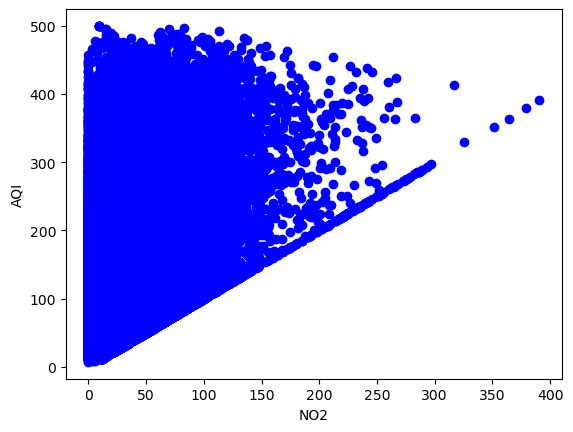

In [4]:
plt.scatter(df['NO2'], df['AQI'], color = 'blue')
plt.xlabel("NO2")
plt.ylabel('AQI')
plt.show()


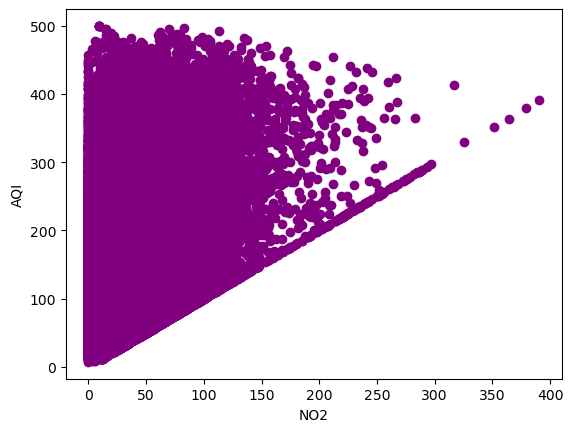

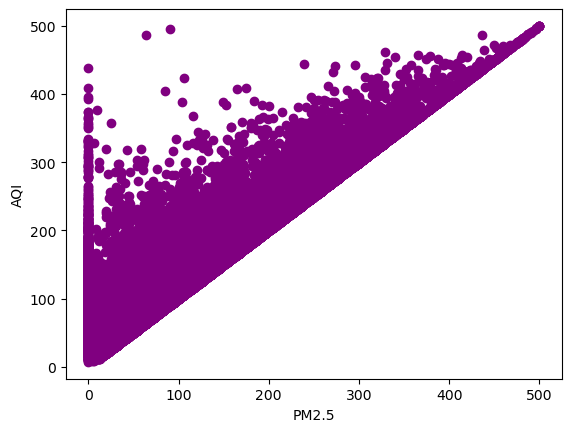

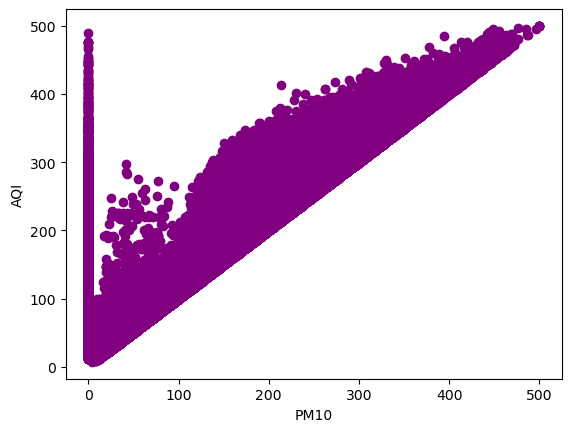

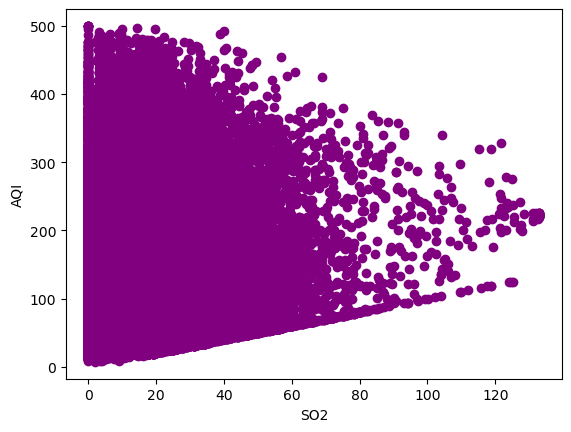

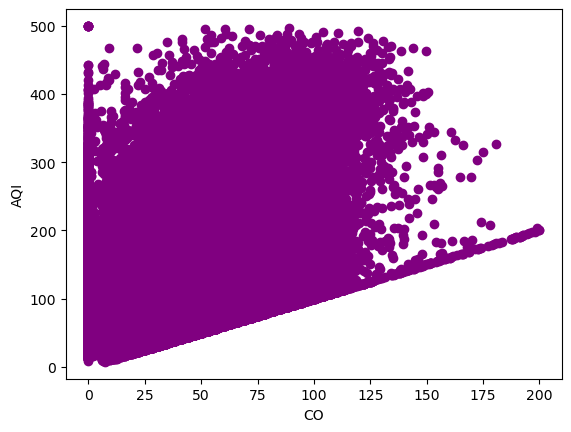

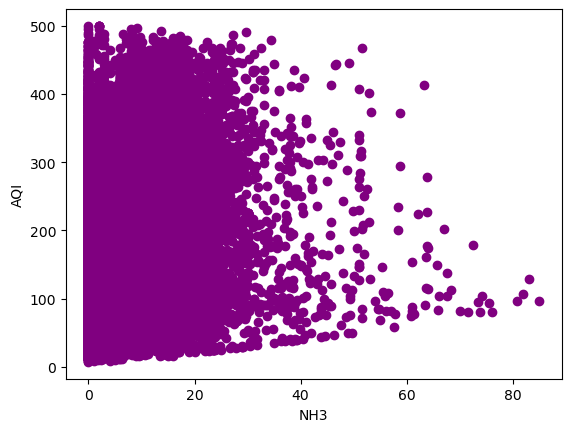

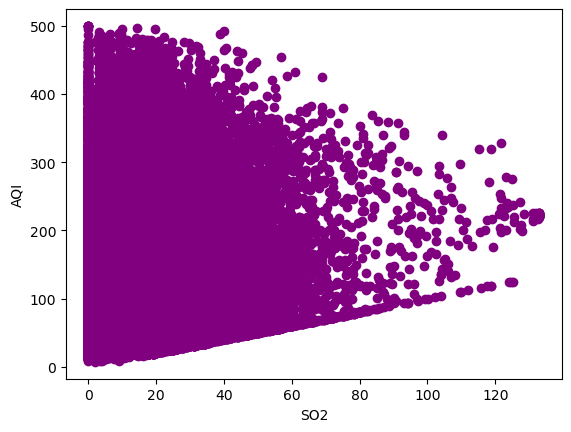

In [5]:
para = ['NO2', 'PM2.5', 'PM10', 'SO2', 'CO', 'NH3', 'SO2']
tar = ['aqi']

for i in para:
    plt.scatter(df[i], df['AQI'] , color = 'purple')
    plt.xlabel(i)
    plt.ylabel('AQI')
    plt.show()

In [6]:
cdf = df[['NO2', 'PM10', 'PM2.5', 'NO2', 'NH3', 'SO2', 'CO', 'AQI']]
correlation_matrix = cdf.corr()[['AQI']]

In [7]:
print(correlation_matrix)

            AQI
NO2    0.488315
PM10   0.873370
PM2.5  0.944199
NO2    0.488315
NH3    0.302402
SO2    0.161998
CO     0.457399
AQI    1.000000


In [8]:
fdf = df[['CO', 'NO2', 'PM2.5', 'PM10', 'NO2', 'AQI']]

In [9]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54002 entries, 0 to 54001
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO      54002 non-null  float64
 1   NO2     54002 non-null  float64
 2   PM2.5   54002 non-null  float64
 3   PM10    54002 non-null  float64
 4   NO2     54002 non-null  float64
 5   AQI     54002 non-null  float64
dtypes: float64(6)
memory usage: 2.5 MB


In [10]:
import seaborn as sns

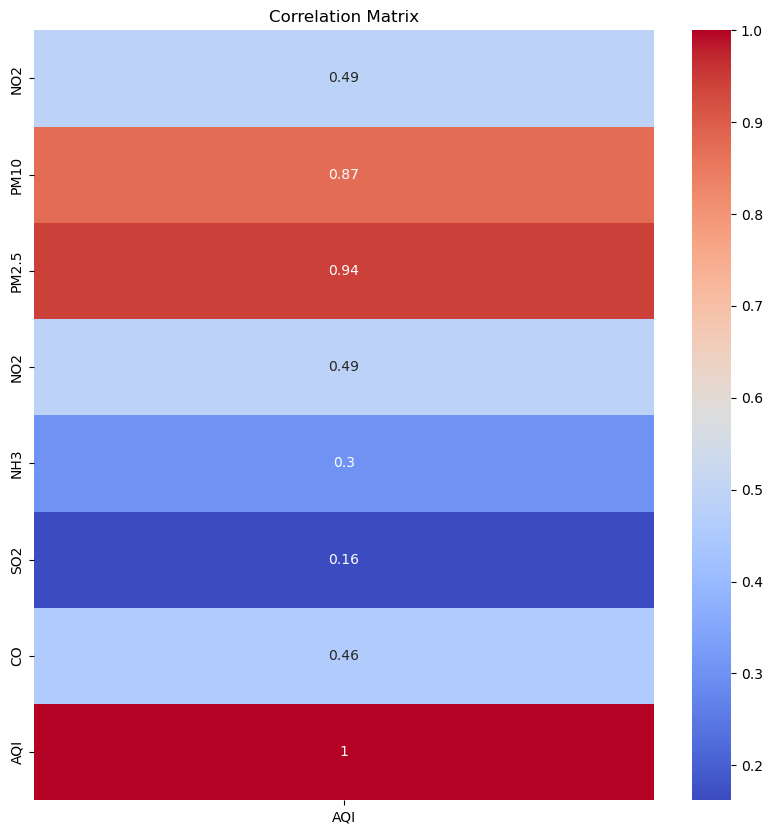

In [11]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [13]:
fdf.head()

,CO,NO2,PM2.5,PM10,NO2,AQI
0,26.73,32.55,26.55,29.73,32.55,33.0
1,37.91,13.09,10.73,10.18,13.09,38.0
2,41.45,28.36,20.55,22.27,28.36,46.0
3,19.45,23.18,19.40,19.27,23.18,23.0
4,33.55,28.27,78.73,82.55,28.27,83.0


In [14]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(fdf)

In [15]:
pdf = pd.DataFrame(scaled_features, columns = fdf.columns[:])
# pdf['AQI'] = fdf['AQI'].values

In [16]:
pdf.head()

,CO,NO2,PM2.5,PM10,NO2,AQI
0,-0.481073,0.044338,-0.874930,-1.014376,0.044338,-1.112560
1,-0.069491,-0.587300,-1.032069,-1.249333,-0.587300,-1.059545
2,0.060831,-0.091662,-0.934527,-1.104032,-0.091662,-0.974721
3,-0.749081,-0.259796,-0.945950,-1.140087,-0.259796,-1.218590
4,-0.230001,-0.094583,-0.356630,-0.379573,-0.094583,-0.582411


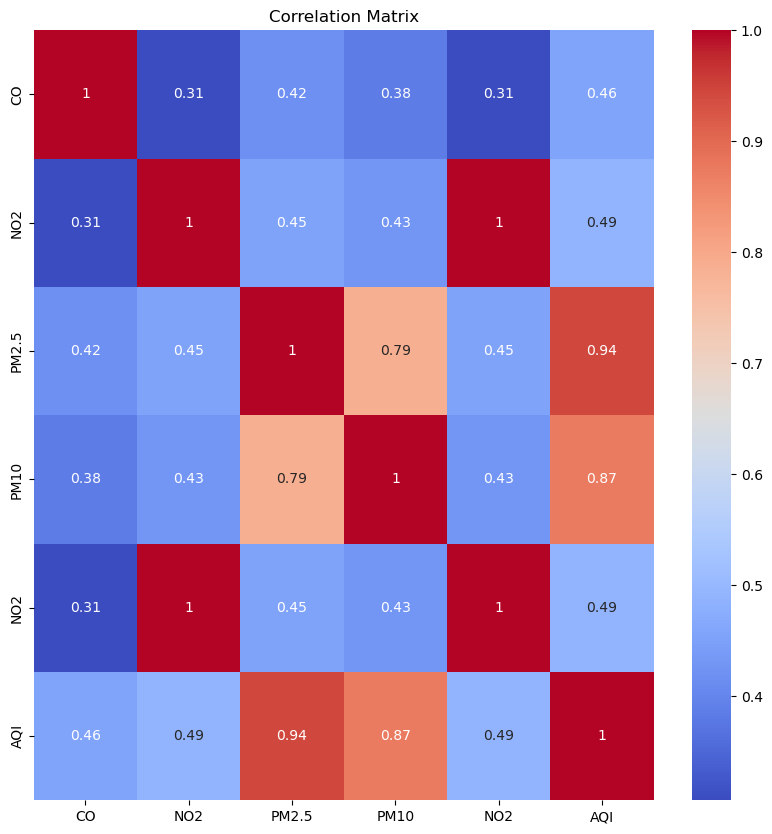

In [17]:
corr_max = pdf.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr_max, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
pdf.head()

,CO,NO2,PM2.5,PM10,NO2,AQI
0,-0.481073,0.044338,-0.874930,-1.014376,0.044338,-1.112560
1,-0.069491,-0.587300,-1.032069,-1.249333,-0.587300,-1.059545
2,0.060831,-0.091662,-0.934527,-1.104032,-0.091662,-0.974721
3,-0.749081,-0.259796,-0.945950,-1.140087,-0.259796,-1.218590
4,-0.230001,-0.094583,-0.356630,-0.379573,-0.094583,-0.582411


In [21]:
x_train, x_test, y_train, y_test = train_test_split(pdf.drop('AQI', axis=1), pdf['AQI'], test_size=0.2, random_state=42)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()


In [24]:
model.fit(x_train, y_train)


LinearRegression()

In [25]:
print(model.coef_)

[0.04922635 0.01941798 0.64405897 0.33142877 0.01941798]


In [26]:
# model.predict(x_test)
accuracy = model.score(x_test, y_test)

In [27]:
print(accuracy)

0.940879729848226


In [29]:
r2_score(y_test, model.predict(x_test))
print(r2_score(y_test, model.predict(x_test)))

0.940879729848226


In [31]:
print(mean_squared_error(y_test, model.predict(x_test)))


0.05958257534122708


In [32]:
print(accuracy)



0.940879729848226
0.940879729848226


In [33]:
import pickle


AttributeError: 'LinearRegression' object has no attribute 'save'